<a href="https://colab.research.google.com/github/rashoba/portfolio/blob/main/Fake_Electronic_Card_Detector_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake Card Detector Project by [Rollademy](https://rollademy.one/open-source)


# MOTIVATION

There are a lot of scammers out there that carry several electronic cards that are fake which they use to carryout transactions thereby duping organizations and individuals their hard-earned monies. This project is designed to detect if a card is fake or not.

#### In this project, we will detect a fake debit/payment/tax (referred to as electronic card) card using computer vision. This Project will help organizations or individuals detect whether the electronic card provided by their employees are original or not.

#### In this project, we will focus on calculating the structural similarity of original electronic card and a fake card uploaded by user.

##Our Approach
The project will be carried out using the following steps:
1.	We will get the images from the user
2.	We will check for image size and format
3.	Change the shape and size of the image so as to compare with the original image
4.	We will conver the imaage to greyscale
5.  We will look for image similarity index
6.	We will look for the image threshold
7.	We will then find the contour and check it out with imutils


#We need to import all the necessary packages


In [ ]:
# We will import structural_similarity from skimage.metrics
#which helps us find the similarity score between the original
#and the fake electronic card image

from skimage.metrics import structural_similarity

# importing imutils helps us grab the contours of the images
import imutils

# import cv2, the widget for image processing requirements
import cv2

# import Image from PIL which is required for downloading the image
from PIL import Image

# import request is used to fetch date from the URLs.
import requests

In [ ]:
# create a folder with the mkdir command and name the folder e_card_fake
!mkdir e_card_fake

# create a folder with the mkdir command and name the folder e_card_fake
!mkdir e_card_fake/image

mkdir: cannot create directory ‘e_card_fake’: File exists
mkdir: cannot create directory ‘e_card_fake/image’: File exists


#Importing the images from an external source

Our original and fake images will be assigned using the REQUESTS keyword

In [ ]:
# Fetch the images and assign them to a value
original = Image.open(requests.get('https://rasheedatoba.com.ng/wp-content/uploads/2024/03/original-tax-card.jpeg', stream=True).raw)
fake = Image.open(requests.get('https://rasheedatoba.com.ng/wp-content/uploads/2024/03/fake-tax-card.jpeg', stream=True).raw)

# Checking out the image file format and size



In [ ]:
# Checking out the file format of the source file.
print("Original image format : ",original.format)
print("Fake image format : ",fake.format)

# Image size, in pixels - width, height.
print("Original image size : ",original.size)
print("Fake image size : ",fake.size)

Original image format :  JPEG
Fake image format :  JPEG
Original image size :  (635, 483)
Fake image size :  (680, 440)



## Convert the fake image to the original image format

In [ ]:
# Resize original image
original = original.resize((250, 160))
print(original.size)

#Save original image
original.save('e_card_fake/image/original.png')

# Resize fake image
fake = fake.resize((250,160))
print(fake.size)

#Save fake image
fake.save('e_card_fake/image/fake.png')#Saves image

(250, 160)
(250, 160)


##  Checking the format and size of the original and fake images

In [ ]:
# Change the image type or extension if required from png to jpg
fake = Image.open('e_card_fake/image/fake.png')
fake.save('e_card_fake/image/fake.png')#can do png to jpg

# Displaying the size of original and fake images.

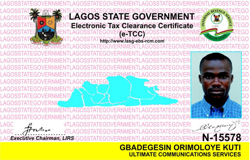

In [ ]:
# Display original image
original

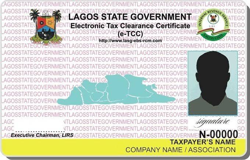

In [ ]:
# Display user given image
fake

# User provided image which will be the original electronic card


##Reading images using opencv

In [ ]:
# load the two input images
original = cv2.imread('e_card_fake/image/original.png')
fake = cv2.imread('e_card_fake/image/fake.png')

# Convert the images to grayscale

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

In [ ]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
fake_gray = cv2.cvtColor(fake, cv2.COLOR_BGR2GRAY)

#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, fake_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.26899616161576806


In [ ]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [ ]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(fake, (x, y), (x + w, y + h), (0, 0, 255), 2)

#### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


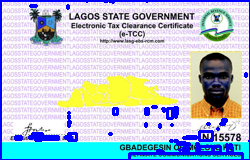

In [ ]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Fake Image


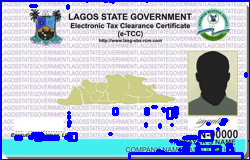

In [ ]:
#Diplay tampered image with contour
print('Fake Image')
Image.fromarray(fake)

Different Image


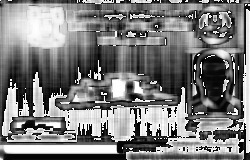

In [ ]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


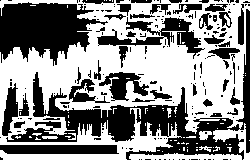

In [ ]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

### Summary

#### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
#### As, our SSIM is ~26.9% we can say that the image user provided is fake or tampered.
#### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  